# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


In [117]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissao': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salario': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df['Salario']=df['Salario'].astype(float)
df['Limite_Credito']=df['Limite_Credito'].astype(float)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].astype(int)
df['Imovel_Proprio'] = df['Imovel_Proprio'].astype(int)
#df['Estado_Civil']=df['Estado_Civil'].astype('category').cat.codes
df=pd.concat([df,pd.get_dummies(df['Estado_Civil'],prefix='Estado_Civil')],axis=1)
df

,Nome,Idade,Profissao,Salario,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio,Estado_Civil_Casamento,Estado_Civil_Solteiro
0,Alice,25,Engenheiro,4500.0,2500.0,0,Casamento,0,1,0
1,Joao,30,Médico,8000.0,4000.0,0,Casamento,0,1,0
2,Charlie,35,Professor,5000.0,4000.0,0,Solteiro,0,0,1
3,David,40,Advogado,10000.0,1000.0,1,Solteiro,1,0,1
4,Eva,45,Médico,12000.0,10000.0,0,Casamento,1,1,0
5,Diego,60,Engenheiro,15000.0,2000.0,1,Solteiro,1,0,1
6,Denize,22,Estudante,1200.0,500.0,0,Solteiro,0,0,1
7,Claudio,24,Estudante,1500.0,250.0,1,Solteiro,0,0,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

Text(0.5, 1.0, 'Mapa de calor da correlação entre variáveis')

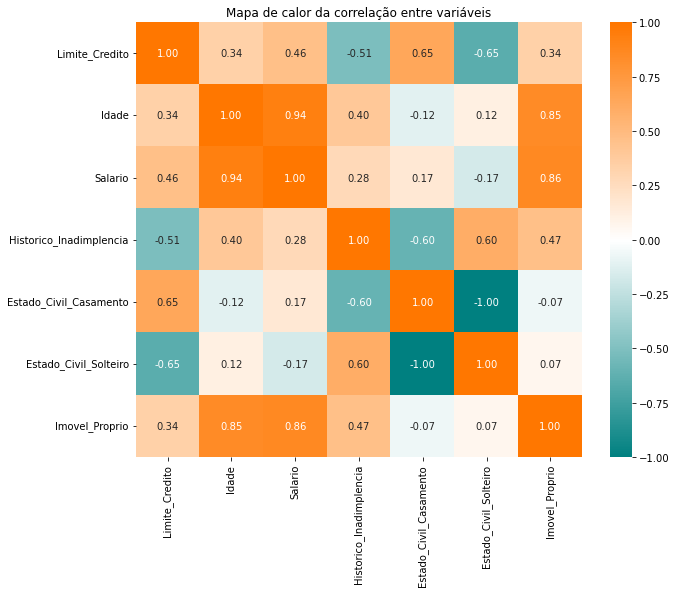

In [127]:

df_corr = df[['Limite_Credito',
              'Idade',
              'Salario',
              'Historico_Inadimplencia',
              'Estado_Civil_Casamento',
              'Estado_Civil_Solteiro',
              'Imovel_Proprio',
            ]].corr()

correlacao_idade_limite = df['Idade'].corr(df['Limite_Credito'])


# Heatmap de correlação
teal_orange = LinearSegmentedColormap.from_list("TealOrange", ["#008080", "#FFFFFF", "#FF7700"])

plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, annot=True, cmap=teal_orange, fmt=".2f")
plt.title('Mapa de calor da correlação entre variáveis')

In [102]:


#agrupar limite de créditox estado civil

#limite_estado= df.groupby('Estado_Civil')['Limite_Credito'].mean()
#limite_profissao= df.groupby('Profissão')['Limite_Credito'].mean()
#limite_idade= df.groupby('Idade')['Limite_Credito'].mean()

#idade_salario= df.groupby('Idade')['limite_Credito','Salario']



#plt.bar(limite_estado.index, limite_estado)
#plt.bar(limite_profissao.index, limite_profissao)
#plt.bar(limite_idade.index, limite_idade)


#plt.bar(cdt_cv.index, cdt_cv)
#plt.bar(cdt_cv.index, cdt_cv)

#idade_salario

<BarContainer object of 6 artists>

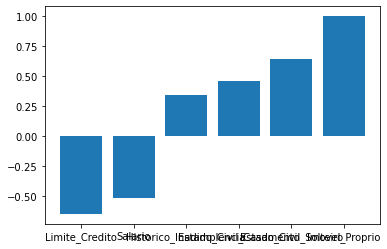

In [132]:
correlacao_idade_limite = df['Limite_Credito'].corr(df['Idade'])
correlacao = df[['Limite_Credito',
                 'Salario',
                 'Historico_Inadimplencia',
                 'Estado_Civil_Casamento',
                 'Estado_Civil_Solteiro',
                 'Imovel_Proprio']].corr()
#print(correlacoes['Limite_Credito'][['Salário', 'Idade']])
correlacao['Limite_Credito'].sort_values()

plt.bar(correlacao['Limite_Credito'].index, correlacao['Limite_Credito'].sort_values())
